In [1]:
%load_ext autoreload
%autoreload 2
import curekinetics
import numpy as np
import matplotlib.pyplot as plt

A = 1.e10
E = 100.
n = 2
m = 0.
T = 400.

cure_model = curekinetics.CureKinetics(A, E, n, m)

n = 1000
t = np.linspace(0, 10000, n)
a = np.zeros(n)

for i in range(1, n):
    a[i] = a[i-1] + cure_model.compute_rate(T, a[i-1])*(t[i]-t[i-1])


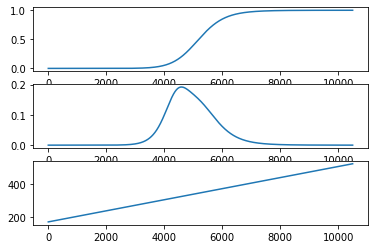

In [2]:
# Recreate the data from the Martin Paper
Ramp = 2  # C/min

HR = 354.9
A1 = 1.152e6
E1 = 58.
n1 = 1.865
y = 0.654

HR1 = y*HR
HR2 = (1-y)*HR
A2 = 3.258e10
E2 = 79.9
n2 = 1.694

cure_model_1 = curekinetics.CureKinetics(A1, E1, n1)
cure_model_2 = curekinetics.CureKinetics(A2, E2, n2)

# Integrate the model every second
t = [0., ]
a1 = [0., ]
da1 = [0., ]
a2 = [0.,]
da2 = [0., ]
a = [0., ]
T = [173., ]
dHdt = [0., ]

i = 1
n = 100000

dt = 1.
while T[i-1] < 273 + 250:
    t.append(t[i-1] + dt)
    T.append(T[i-1] + Ramp*(dt/60.))
    
    da1.append(cure_model_1.compute_rate(T[i], a1[i-1]))
    da2.append(cure_model_2.compute_rate(T[i], a2[i-1]))
    a1.append(a1[i-1] + cure_model_1.compute_rate(T[i], a1[i-1])*dt)
    a2.append(a2[i-1] + cure_model_2.compute_rate(T[i], a2[i-1])*dt)
    
    dHdt.append(HR1*da1[i] + HR2*da2[i])
    
    a.append(a1[i] * y + a2[i] * (1.0 - y))
    i += 1

fig, ax = plt.subplots(3, 1)
ax[0].plot(np.array(t), np.array(a1))
ax[1].plot(np.array(t), np.array(dHdt))
ax[2].plot(np.array(t), np.array(T))
fig.patch.set_facecolor('white')

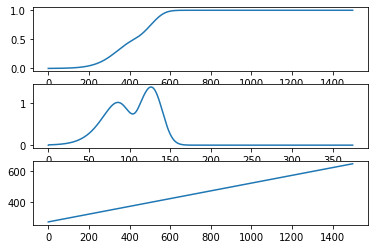

In [3]:
# Recreate the data from the Martin Paper
Ramp = 15  # C/min

HR = 361.8
A1 = 2.975e6
E1 = 56.7
n1 = 0.831
y = 0.405

HR1 = y*HR
HR2 = (1-y)*HR
A2 = 2.218e10
E2 = 92.6
n2 = 1.163

cure_model_1 = curekinetics.CureKinetics(A1, E1, n1)
cure_model_2 = curekinetics.CureKinetics(A2, E2, n2)

# Integrate the model every second
t = [0., ]
a1 = [0., ]
da1 = [0., ]
a2 = [0.,]
da2 = [0., ]
a = [0., ]
T = [273., ]
dHdt = [0., ]

i = 1
n = 1500

dt = 1.
while i < n:  # T[i-1] < (273 + 250.):
    t.append(t[i-1] + dt)
    T.append(T[i-1] + Ramp*(dt/60.))
    
    da1.append(cure_model_1.compute_rate(T[i], a1[i-1]))
    da2.append(cure_model_2.compute_rate(T[i], a2[i-1]))
    a1.append(cure_model_1.update_conversion(T[i], a1[i-1], dt))
    a2.append(cure_model_2.update_conversion(T[i], a2[i-1], dt))
    
    dHdt.append(HR1*da1[i] + HR2*da2[i])
    
    a.append(min(a1[i] * y + a2[i] * (1.0 - y), 1.0))
    i += 1

fig, ax = plt.subplots(3, 1)
ax[0].plot(np.array(t), np.array(a))
ax[1].plot(np.array(T) - 273, np.array(dHdt))
ax[2].plot(np.array(t), np.array(T))
fig.patch.set_facecolor('white')

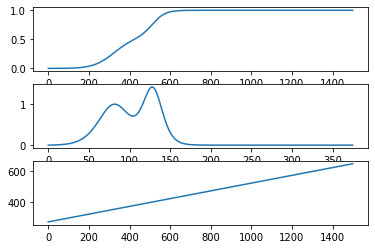

In [4]:
# Recreate the data from the Martin Paper
Ramp = 15  # C/min

HR = 361.8
A1 = 3.407e4
E1 = 42.8
m1 = 0.349
n1 = 1.370
y = 0.535

HR1 = y*HR
HR2 = (1-y)*HR
A2 = 1.183e10
E2 = 89.4
m2 = 0.380
n2 = 1.424

cure_model_1 = curekinetics.CureKinetics(A1, E1, n1, m1)
cure_model_2 = curekinetics.CureKinetics(A2, E2, n2, m2)

# Integrate the model every second
t = [0., ]
a1 = [1e-10, ]
da1 = [0., ]
a2 = [1e-10,]
da2 = [0., ]
a = [0., ]
T = [273., ]
dHdt = [0., ]

i = 1
n = 1500

dt = 1.
while i < n:  # T[i-1] < (273 + 250.):
    t.append(t[i-1] + dt)
    T.append(T[i-1] + Ramp*(dt/60.))
    
    da1.append(cure_model_1.compute_rate(T[i], a1[i-1]))
    da2.append(cure_model_2.compute_rate(T[i], a2[i-1]))
    a1.append(cure_model_1.update_conversion(T[i], a1[i-1], dt))
    a2.append(cure_model_2.update_conversion(T[i], a2[i-1], dt))
    
    dHdt.append(HR1*da1[i] + HR2*da2[i])
    
    a.append(min(a1[i] * y + a2[i] * (1.0 - y), 1.0))
    i += 1

fig, ax = plt.subplots(3, 1)
ax[0].plot(np.array(t), np.array(a))
ax[1].plot(np.array(T) - 273, np.array(dHdt))
ax[2].plot(np.array(t), np.array(T))
fig.patch.set_facecolor('white')

1.3228634153737882


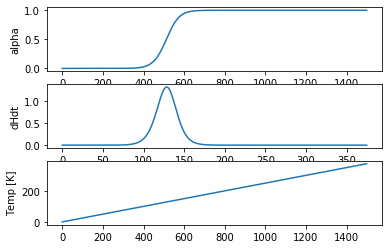

In [7]:
### Investigate the effects of the initial value for conversion
# Recreate the data from the Martin Paper
Ramp = 15  # C/min

HR = 361.8 * (1.0 - 0.535)
A1 = 1.183e10
E1 = 89.4
m1 = 0.380
n1 = 1.424

cure_model = curekinetics.CureKinetics(A1, E1, n1, m1, HR)
fig, ax = plt.subplots(3, 1)

# Integrate the model every second
t = [0., ]
a1 = [1e-10, ]
da1 = [0., ]
T = [273., ]
dHdt = [0., ]

i = 1
n = 1500

dt = 1.
while i < n:  # T[i-1] < (273 + 250.):
    t.append(t[i-1] + dt)
    T.append(T[i-1] + Ramp*(dt/60.))

    da1.append(cure_model.compute_rate(T[i], a1[i-1]))
    a1.append(cure_model.update_conversion(T[i], a1[i-1], dt))

    dHdt.append(HR*da1[i])

    i += 1

ax[0].plot(np.array(t), np.array(a1))
ax[0].set_ylabel('alpha')
ax[1].plot(np.array(T) - 273, np.array(dHdt))
ax[1].set_ylabel('dHdt')
ax[2].plot(np.array(t), np.array(T) - 273.)
ax[2].set_ylabel('Temp [K]')
fig.patch.set_facecolor('white')

print(np.array(dHdt).max())

In [8]:
A2 = 1.183e10
E2 = 89.4
m2 = 0.380
n2 = 1.424
HR = (1.0 - 0.535) * 361.8
cure_kinetics_martin_single = curekinetics.CureKinetics(A2, E2, n2, m2, HR)

n = 1000
time = np.arange(n)
ramp = 15.
temperature= time * ramp / 60. + 273.
conversion_history, heat_flow_history = cure_kinetics_martin_single.compute_conversion_history(time, temperature,
                                                                             return_heat_flow=True)

In [9]:
print(np.trapz(heat_flow_history, time), HR)

168.23694178722207 168.237


In [10]:
heat_flow_history.max()

1.3228633329555204

###### 

In [11]:
# Read in the experimental data
import xlrd

data_dir = "X:\iacmi\Volkswagen\Siddharth\Transluscent"
data_file = data_dir + '/' + '3Cpm_a.xlsx'

book = xlrd.open_workbook(data_file)
sh = book.sheet_by_index(0)

sample_mass = 1.
sample_mass_found = False
in_data = False
data = []
for n_row in range(sh.nrows):
    row = sh.row(n_row)
    if in_data:
        data.append([row[i].value for i in range(4)])
    elif 'StartOfData' in row[0].value:
        in_data = True
    # Find the data line with the sample mass        
    elif 'Size' in row[0].value:
        sample_mass_found = True
        sample_mass = row[1].value
        
data = np.array(data)

time = data[:, 0] * 60
n = len(time)
temperature = data[:, 1]

if sample_mass_found:
    heat_flow = data[:, 2] / sample_mass
else:
    heat_flow = data[:, 2]
    print('Sample mass could not be found')

peak_heat_flow = heat_flow.max()
peak_heat_flow_idx = heat_flow.argmax()
peak_heat_flow_temp = temperature[peak_heat_flow_idx]
print('Peak heat flow:', peak_heat_flow, 'mW/mg at temperature: ', peak_heat_flow_temp, 'C')

# Find the point where the heat flow goes to 0 after the peak
for i in range(peak_heat_flow_idx, n):
    if heat_flow[i] <= 0.:
        sample_max_idx = i
        break
        
for i in range(peak_heat_flow_idx, 0, -1):
    if heat_flow[i] <= 0.:
        sample_min_idx = i
        break

time = time[sample_min_idx: sample_max_idx] - time[sample_min_idx]
temperature = temperature[sample_min_idx: sample_max_idx]
heat_flow = heat_flow[sample_min_idx: sample_max_idx]

heat_of_reaction = np.trapz(heat_flow, time)
print('Heat of reaction:', heat_of_reaction, 'J/g')


Peak heat flow: 2.6810666666666667 mW/mg at temperature:  116.3748 C
Heat of reaction: 216.45411050552156 J/g


In [28]:
ramp = 15.
dt = 1.
alpha, time, temp, dhdt = cure_model.compute_ramp_history(30., 1.)

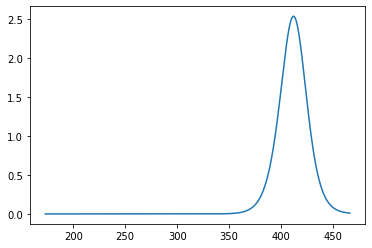

In [30]:
plt.plot(temp, dhdt)

In [18]:
alpha[-1]

0.9999990000430785

In [31]:
1.54531 / 13.2

0.11706893939393939